# Project 1: Counting words in college subreddits

Due 9/16. Reminder that you are allowed to use any amount of AI assistance or outside resources with citation

## Part 1: word counting and bag of words

In [17]:
#install spacy in the current conda environment
!pip install spacy


In [18]:
#download a small language model to help with cleaning tasks
!python -m spacy download en_core_web_sm



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 23.4 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [19]:
#had issues with matplotlib
!pip install matplotlib

In [20]:
#import required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import spacy
language_model = spacy.load("en_core_web_sm")
import matplotlib.pyplot as plt

import numpy as np

### Problem 1 and example: common words in the Michigan subreddit

In [98]:
#read the data from a csv file in the folder
mich=pd.read_csv("umich.csv")

In [99]:
#jupyter will print a pretty representation of most python objects if you just put the name
#we can see that the full text of each reddit comment is provided in the "text" column
mich

,Unnamed: 0,date,post_votes,text,user,com_votes
0,0,2024-09-04 15:33:20,2,"Zingermans has a nice reuben, pretty pricey bu...",Suspicious-Bad703,2
1,1,2024-09-04 15:33:20,2,I really love Tomokun!,webstbre000,2
2,2,2024-09-04 15:33:20,2,The Seoul is pretty good I especially like the...,iaxlmao,1
3,3,2024-09-04 15:33:20,2,A lot of it depends on what type of food and w...,I-696,1
4,4,2024-09-04 14:32:17,1,You can book completely enclosed private study...,sneep_,2
...,...,...,...,...,...,...
8334,8334,2024-07-02 12:35:36,9,It isn’t a student org,Vibes_And_Smiles,1
8335,8335,2024-07-02 11:07:10,0,Life \nMatter \nLife's matter,tctu,8
8336,8336,2024-07-02 11:07:10,0,google,SUPERazkari,4
8337,8337,2024-07-02 11:07:10,0,That’s a hard question to answer for a set of ...,Own-Resident-3837,-1


In [100]:
#this is a function that does some light cleaning, by removing newline characters, converting to lowercase, and removing punctuation

def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

In [101]:
#pandas allows us to quickly apply this cleaning function to all rows in a column
mich['cleaned_text'] = mich['text'].apply(clean)

In [102]:
#we can see the first comment after cleaning vs before
mich["cleaned_text"][0]

'zingermans has a nice reuben pretty pricey but the sammies are pretty big'

In [103]:
mich["text"][0]

'Zingermans has a nice reuben, pretty pricey but the sammies are pretty big'

In [104]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(mich['cleaned_text'])

In [105]:
#this is a sparse matrix, which is a more efficient way to store a matrix with many zeros
#the matrix has 8339 rows (one for each comment) and 15289 columns (one for each unique word in the dataset)
bag_of_words

<8339x15289 sparse matrix of type '<class 'numpy.int64'>'
	with 221217 stored elements in Compressed Sparse Row format>

In [106]:
#create a dataframe from the sparse matrix
#this is a more human-readable way to view the data
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
bow_df

,aa,aadl,aapd,aata,ab,abab,abandon,abandoned,abbreviation,abbreviations,...,zoned,zones,zoning,zoo,zoom,zoomer,zoomers,zuckerberg,𝓲𝓷𝓼𝓮𝓬𝓾𝓻𝓮,𝘢𝘩𝘦𝘮
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
#dataframes have a convenient method for summing the values in each column
#this will give us the number of times each word appears in the dataset
word_counts = bow_df.sum()
#we can sort the values to see the most common words
word_counts = word_counts.sort_values(ascending=False)

#notice that the top words are not very informative, as they are common words that appear in many contexts
#and bottom words include a lot of typos and other noise
word_counts

the            11306
to              8480
and             6921
you             6256
of              5028
               ...  
journals           1
journeywhen        1
jpg                1
js                 1
𝘢𝘩𝘦𝘮               1
Length: 15289, dtype: int64

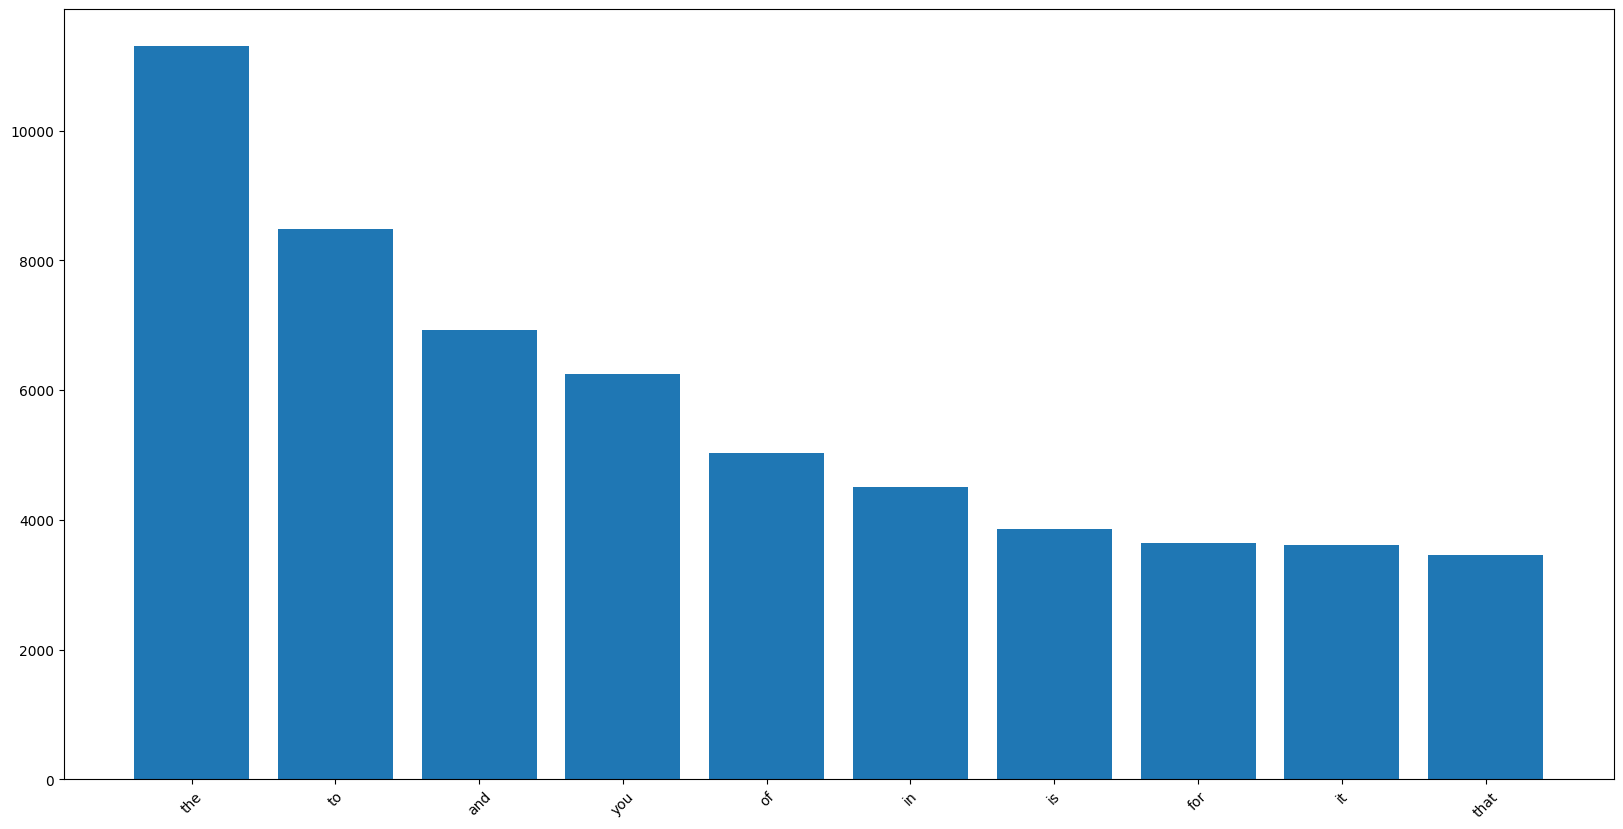

In [108]:
#we can plot the most common words
#we will only plot the top 10 words for readability
word_counts = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(word_counts.index, word_counts.values)
plt.xticks(rotation=45)
plt.show()

#### Question 1: what do you notice about the words in this plot? Is this useful for studying the community?

Answer here: Based on the top 10 words it looks like basically all are stop words. Essentially meaning that these words are either conjunctions or other filler words in sentences that by themselves don't give us a deeper understanding of a sentence nor do they provide any insight into what it could be talking about. These words alone would not be useful for studying because it is nearly impossible to draw any insight from these words alone. 

#### Lemmatization and stopword removal

In [109]:
#lemmatization function from the openclassrooms reading
def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

In [110]:
#we can further process the text by removing stopwords and lemmatizing
mich['lemmatized_text'] = mich['cleaned_text'].apply(lemmatize)

In [111]:
#count vectorizer also has parameters min_df and max_df that can be used to filter out words that are too rare or too common
#min_df=3 means that a word must appear in at least 3 documents to be included, this will remove typos and rare words
#max_df=0.3 means that a word must appear in at most 30% of documents to be included, this will remove corpus-specific stopwords

#we are also able to include n-grams in the count vectorizer
#n-grams are sequences of n words that appear together in the text
#the n-gram_range parameter specifies the minimum and maximum n-gram size to include (so in this case, we are including both unigrams and bigrams)

vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(mich['lemmatized_text'])

In [112]:
#we can see that we filtered out 11000 common words and typos
bag_of_words

<8339x8637 sparse matrix of type '<class 'numpy.int64'>'
	with 126833 stored elements in Compressed Sparse Row format>

In [113]:
#we can repeat the previous code to create a dataframe and count the words
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = bow_df.sum()
word_counts = word_counts.sort_values(ascending=False)
word_counts

not               2862
student           1183
like              1183
people            1124
class              988
                  ... 
sell minnesota       3
cred                 3
credential           3
sell oregon          3
pay dollar           3
Length: 8637, dtype: int64

In [114]:
#we can convert this to a percentage instead of an absolute count by dividing by the total number of words
word_counts = word_counts / word_counts.sum()

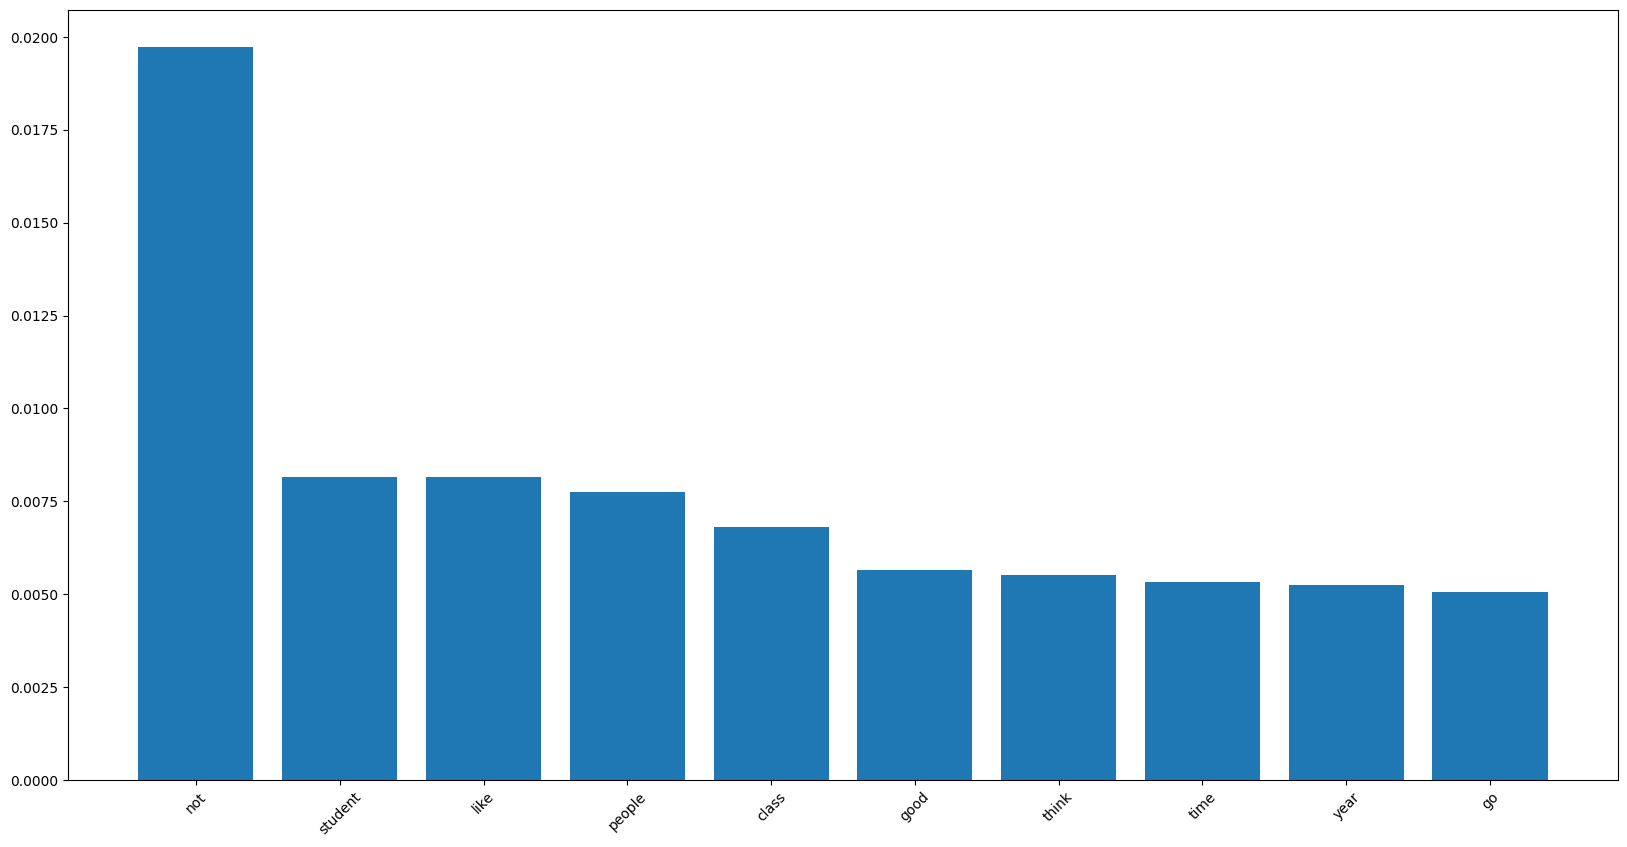

In [115]:
#we can plot the most common words
#we will only plot the top 10 words for readability
plot_list = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

In [116]:
#pandas allows us to access specific words in the series using the index
word_counts["student loan"]

4.138501862325838e-05

In [117]:
#we can also use a list of words to compare and plot specific words
plot_list=word_counts[["history", "business", "computer science", "cs", "computer"]]
plot_list

history             0.000352
business            0.000600
computer science    0.000034
cs                  0.001228
computer            0.000262
dtype: float64

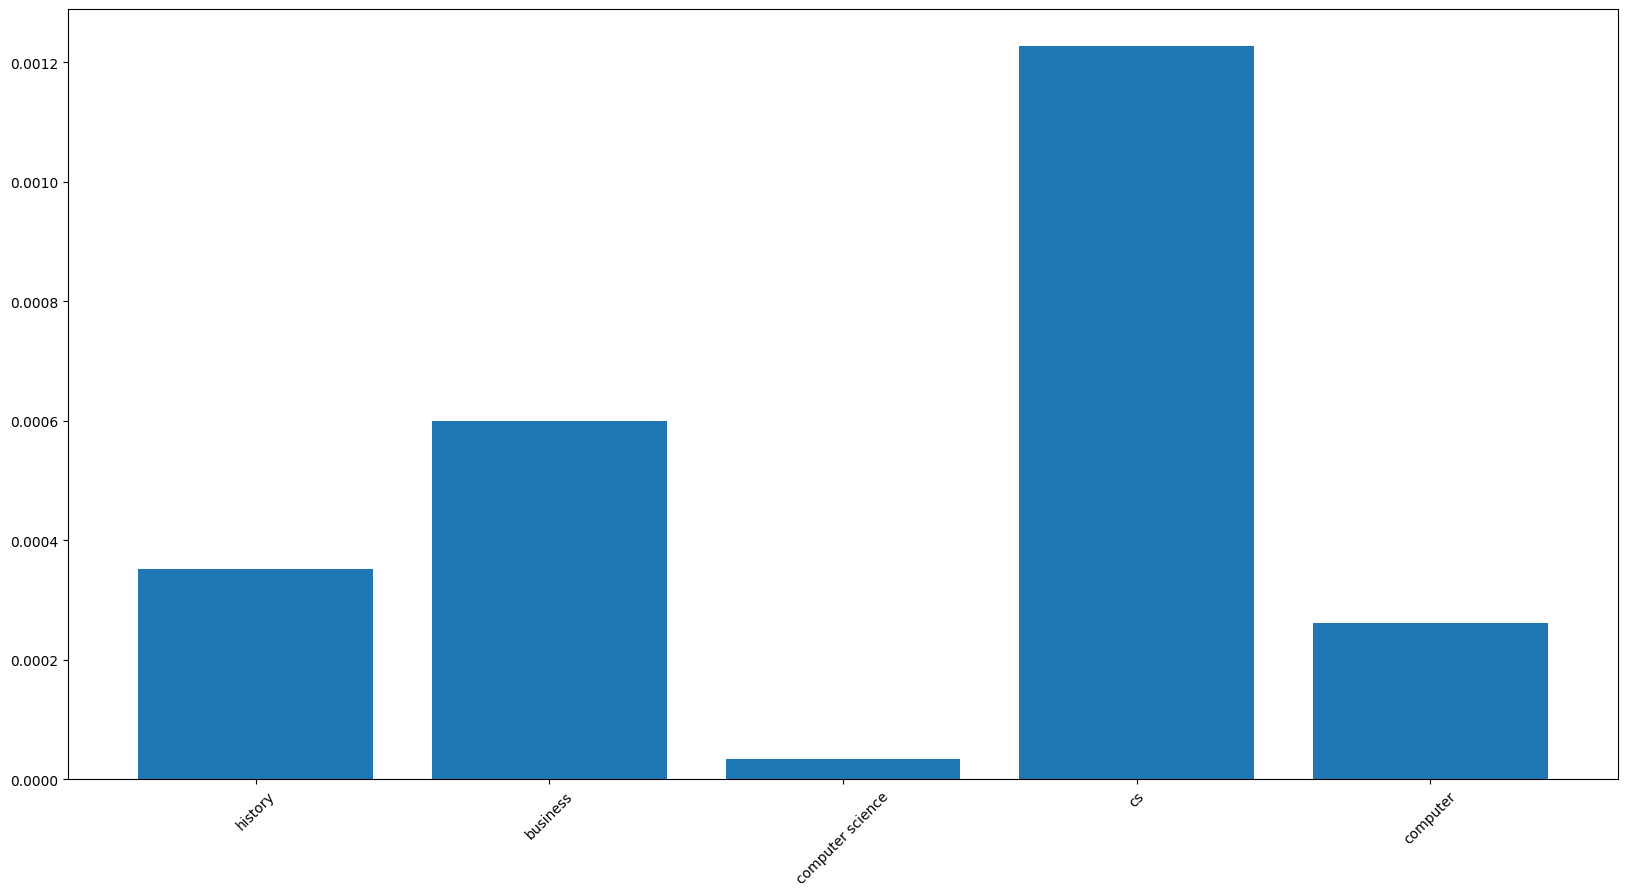

In [118]:

plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

#### Question 2:

In [119]:
#TODO: pick 5 words that you find interesting or are curious about, and plot a bar plot of their frequency in this dataset 

In [120]:
words_of_interest = ["math", "easy",  "complicated", "hard", "difficult"]

plot = word_counts[words_of_interest]

plot

math           0.002262
easy           0.001773
complicated    0.000041
hard           0.001517
difficult      0.000635
dtype: float64

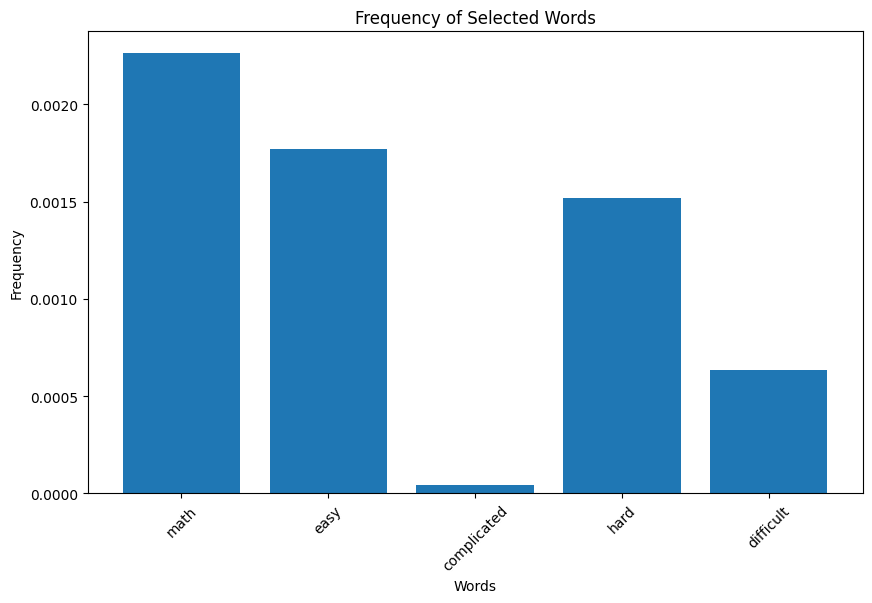

In [121]:
plt.figure(figsize=(10,6))
plt.bar(plot.index, plot.values)
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Frequency of Selected Words")
plt.show()

### Problem 2: repeat this process with the Illinois subreddit data (in this directory as "uiuc.csv"). You should not have to change too much in the previous code besides the dataframe path and name. Your notebook should include the two bar graphs including and excluding stopwords. Use the same 5 words and compare their relative frequency between the two subreddits. Discuss any interesting differences you notice in a short markdown cell. 

In [122]:
uiuc=pd.read_csv("uiuc.csv")


In [123]:
uiuc

,Unnamed: 0,date,post_votes,text,user,com_votes
0,0,2024-09-04 14:43:40,2,Have the same professor! And in lecture he did...,zhen3441,2
1,1,2024-09-04 14:43:40,2,Do you find it helpful to still go to the lect...,Kai2747,1
2,2,2024-09-04 12:52:08,3,Have you tried emailing University Housing to ...,TurboBKTastic,2
3,3,2024-09-04 12:52:08,3,Purchasing Illini Cash should get you added to...,HoosierCAB,2
4,4,2024-09-04 12:52:08,3,"Just did, thanks for the suggestion! It hadn't...",Sector-Both,1
...,...,...,...,...,...,...
4720,4720,2024-08-21 20:28:40,1,Im interested if you're still looking,Accomplished_Fix2409,0
4721,4721,2024-08-21 20:26:15,7,I went to one of the taylor nights. was quite ...,student176895,4
4722,4722,2024-08-21 20:21:54,10,"Hey, I’m so sorry to hear that’s happening. If...",OCCLUIUC,5
4723,4723,2024-08-21 20:21:54,10,"AFAIK, the “cleaning company” that UGroup empl...",perpetuallytired29,3


In [124]:
uiuc['cleaned_text'] = uiuc['text'].apply(clean)

In [125]:
uiuc["cleaned_text"][0]

'have the same professor and in lecture he did say we were gonna have to learn some of the stuff ourself i would recommend using online resources such as pauls online math notes and professor leonard on youtube personally ive been learning the material from those sources before going to lecture'

In [126]:
uiuc["text"][0]

'Have the same professor! And in lecture he did say we were gonna have to learn some of the stuff ourself\xa0\n\nI would recommend using online resources such as Paul’s Online Math Notes and Professor Leonard on YouTube. Personally, I’ve been learning the material from those sources before going to lecture'

In [127]:
vectorizer = CountVectorizer()
bag_of_words2 = vectorizer.fit_transform(uiuc['cleaned_text'])
bag_of_words2


<4725x10109 sparse matrix of type '<class 'numpy.int64'>'
	with 98566 stored elements in Compressed Sparse Row format>

In [128]:
bow_df2 = pd.DataFrame(bag_of_words2.toarray(), columns=vectorizer.get_feature_names_out())
bow_df2

,aa,aaa,aaaaah,aaabb,ab,abandoned,abcc,abide,abilities,ability,...,zombie,zone,zones,zoo,zoom,zoomed,봉사를,세계로,숭실,진리와
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4720,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4721,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4722,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4723,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
word_counts2 = bow_df2.sum()

In [130]:
word_counts2 = word_counts2.sort_values(ascending=False)

In [131]:
word_counts2

the                                                                                                       4613
to                                                                                                        3629
and                                                                                                       2973
you                                                                                                       2551
of                                                                                                        1854
                                                                                                          ... 
httpswwwwciacomnewsraresquirrelmemorializedonuoficampus                                                      1
httpswwwurbanaillinoisussitesdefaultfilesattachmentslandlordtenantpdf                                        1
httpswwwuoficreditunionorgcreditcreditcardshttpswwwuoficreditunionorgcreditcreditcards                       1
h

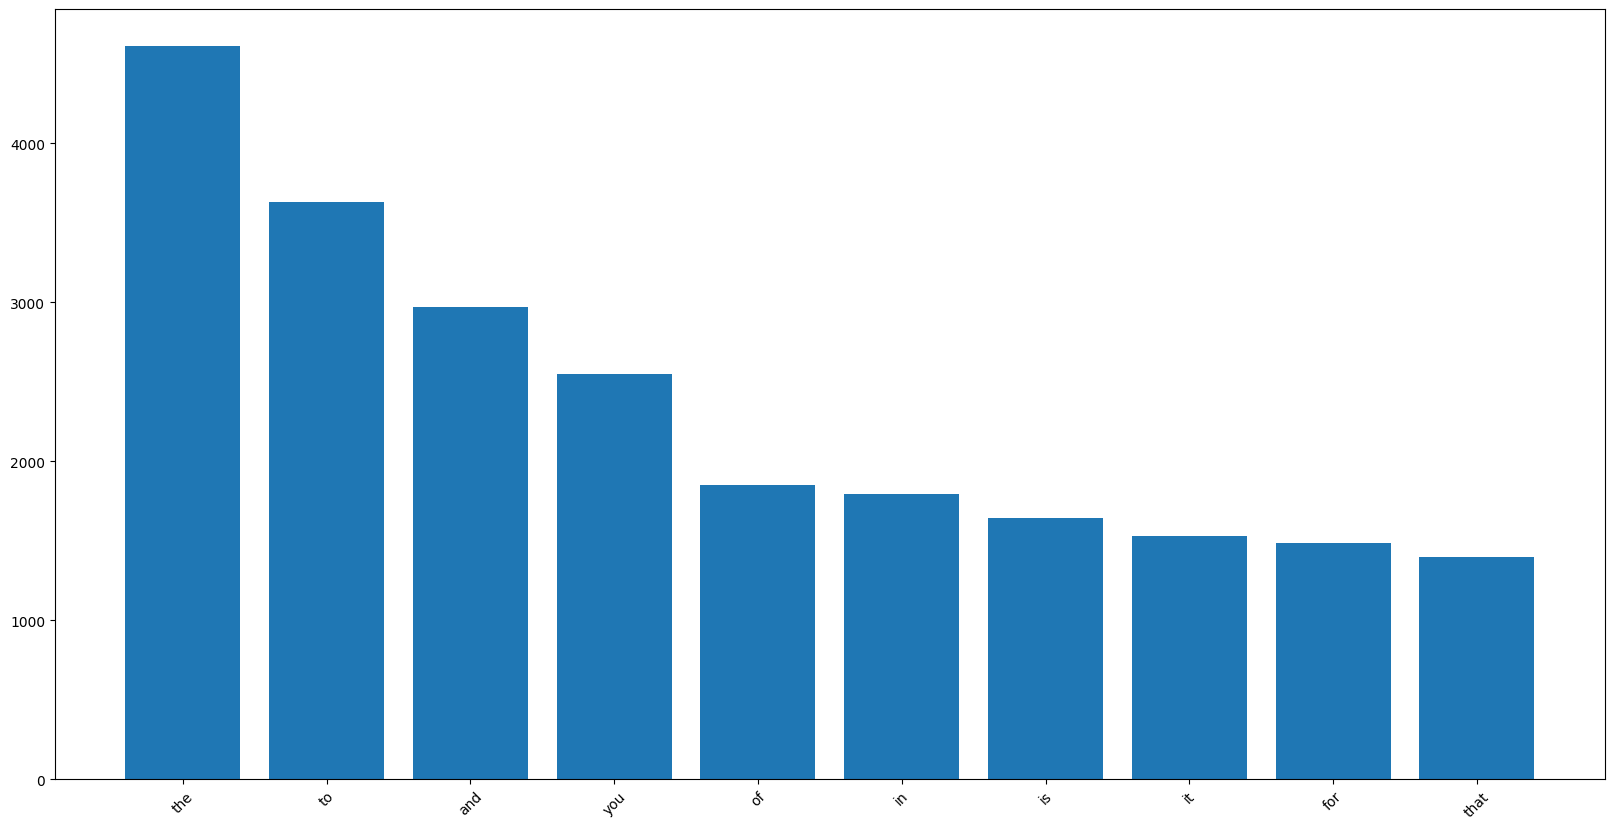

In [132]:
word_counts2 = word_counts2.head(10)
plt.figure(figsize=(20,10))
plt.bar(word_counts2.index, word_counts2.values)
plt.xticks(rotation=45)
plt.show()

In [133]:
uiuc['lemmatized_text'] = uiuc['cleaned_text'].apply(lemmatize)

In [134]:
vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words2 = vectorizer.fit_transform(uiuc['lemmatized_text'])

In [135]:
bag_of_words2

<4725x3891 sparse matrix of type '<class 'numpy.int64'>'
	with 49429 stored elements in Compressed Sparse Row format>

In [136]:
bow_df2 = pd.DataFrame(bag_of_words2.toarray(), columns=vectorizer.get_feature_names_out())
word_counts2 = bow_df2.sum()
word_counts2 = word_counts2.sort_values(ascending=False)
word_counts2

not               1205
like               534
people             481
good               388
time               376
                  ... 
not personally       3
not person           3
not park             3
not open             3
ab                   3
Length: 3891, dtype: int64

In [137]:
word_counts2 = word_counts2 / word_counts2.sum()

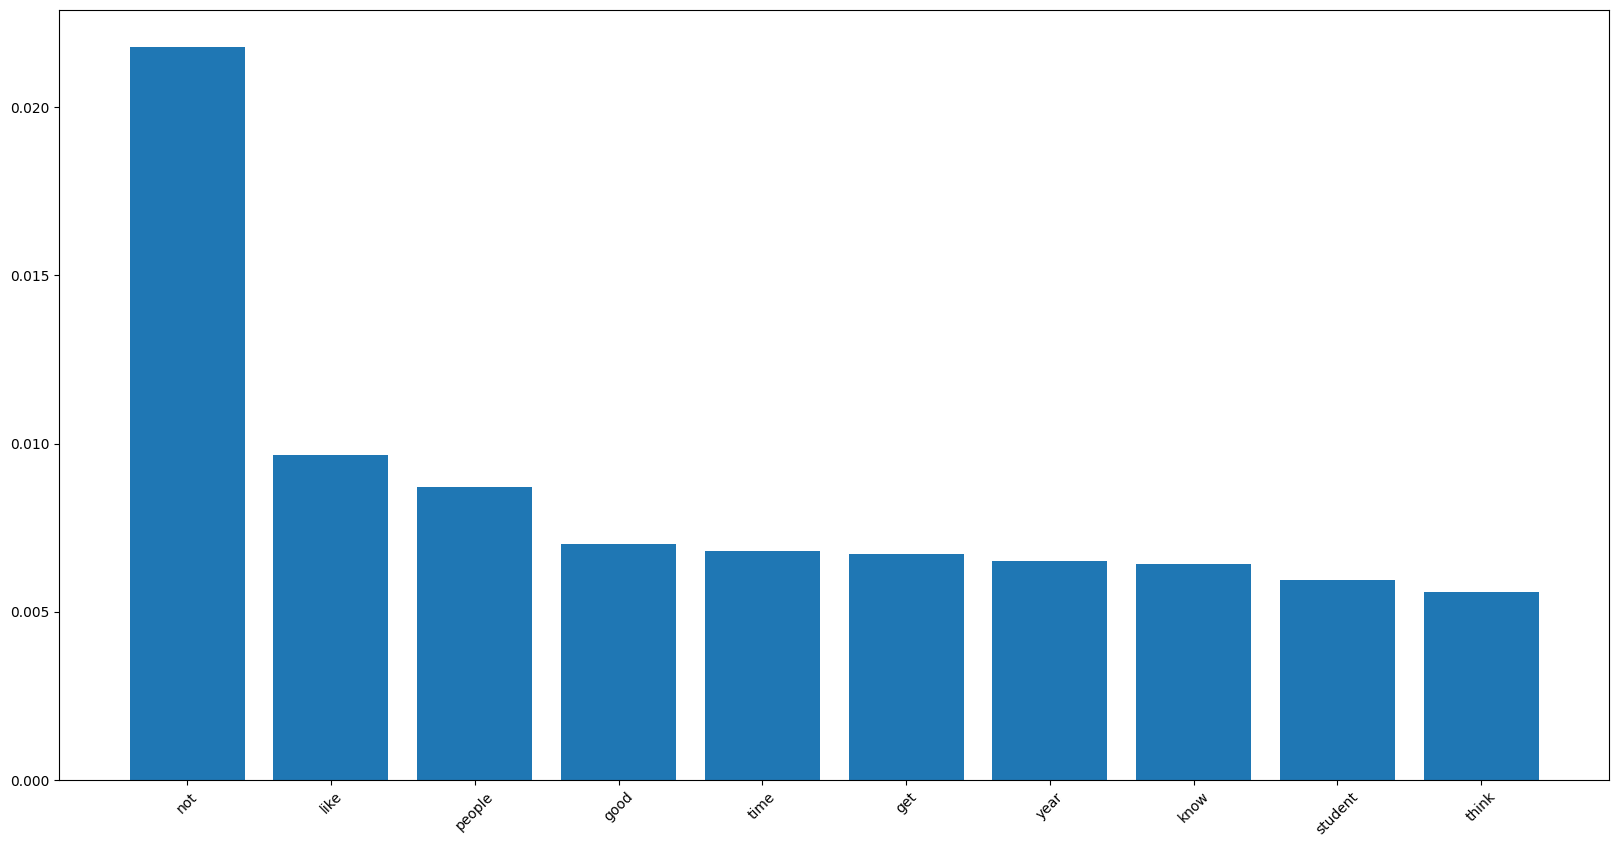

In [138]:
plot_list2 = word_counts2.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list2.index, plot_list2.values)
plt.xticks(rotation=45)
plt.show()

In [139]:
plot_list2=word_counts2[["history", "business", "computer science", "cs", "computer"]]
plot_list2

history             0.000344
business            0.000543
computer science    0.000054
cs                  0.001411
computer            0.000290
dtype: float64

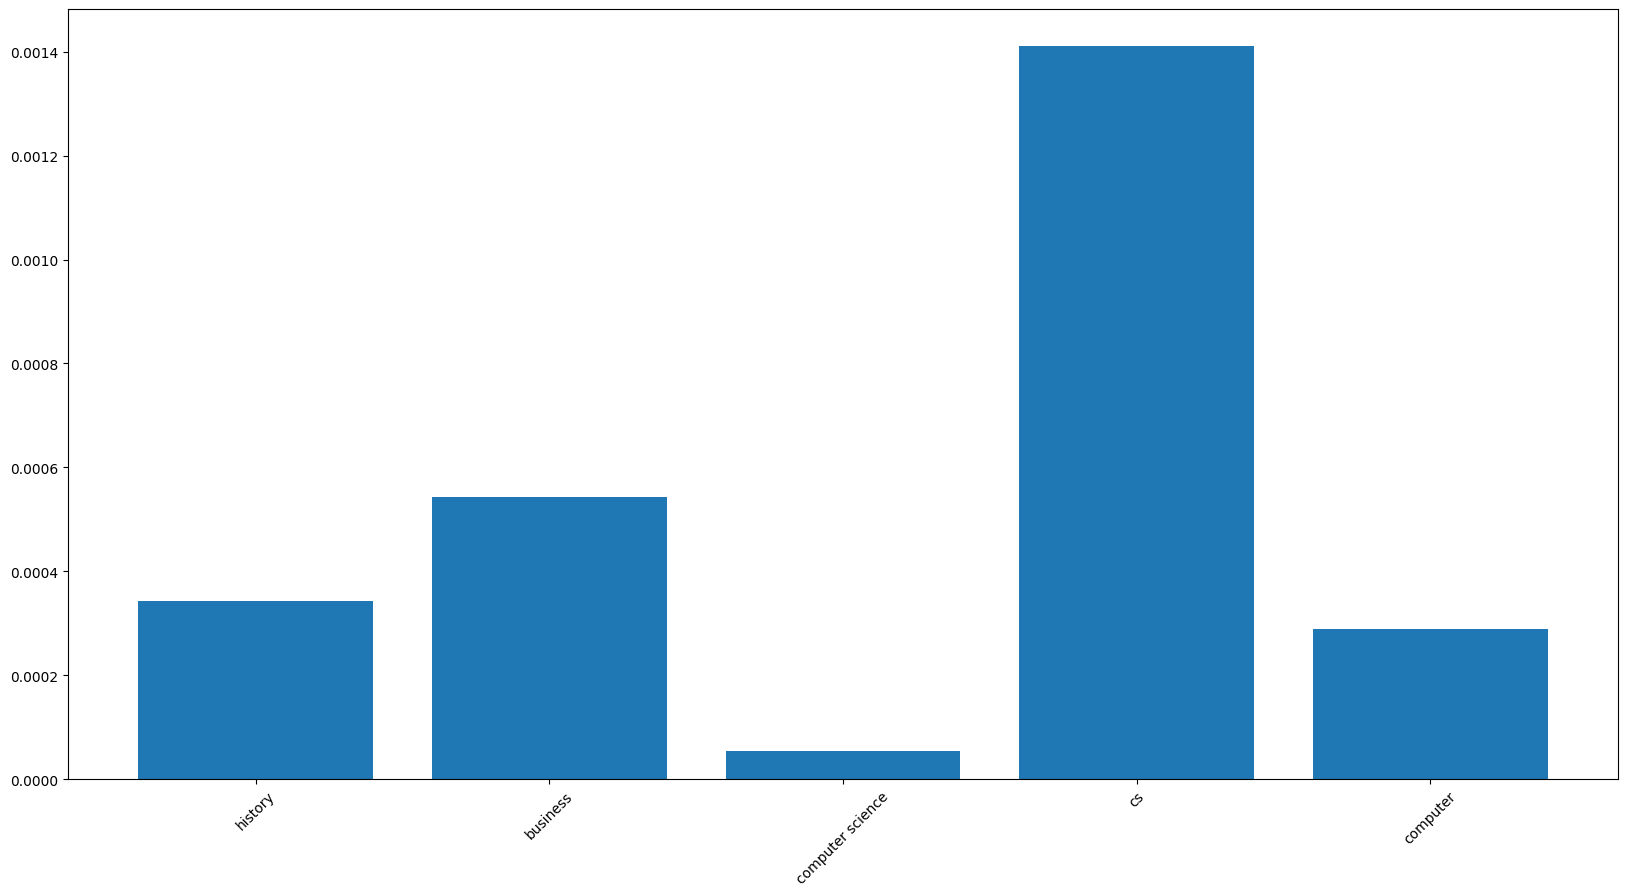

In [140]:
plt.figure(figsize=(20,10))
plt.bar(plot_list2.index, plot_list2.values)
plt.xticks(rotation=45)
plt.show()

In [141]:
words_of_interest2 = ["math", "easy",  "complicated", "hard", "difficult"]

plot2 = word_counts2[words_of_interest2]
plot2

math           0.000543
easy           0.001339
complicated    0.000054
hard           0.001791
difficult      0.000470
dtype: float64

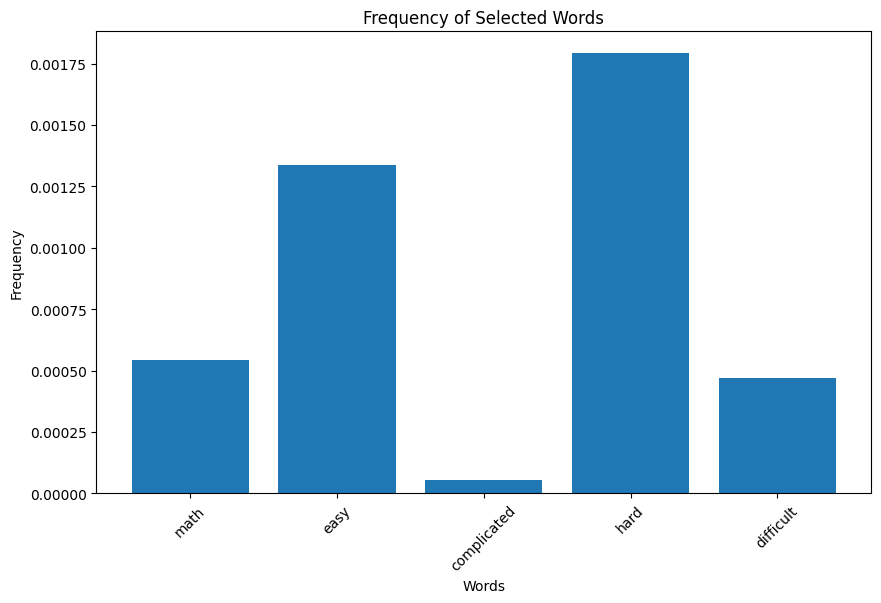

In [142]:
plt.figure(figsize=(10,6))
plt.bar(plot2.index, plot2.values)
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Frequency of Selected Words")
plt.show()

### Comparing the uiuc data with the mich data:

After repeating the proccess with the uiuc data. We see some similarities and some key differences. For both datasets prior to removing the stop words we see that we get similar results. Both data sets top words are stop words and word that simply don't give us any meanng on their own. But after we handle the stop words we see the similar change. And although there are some differences in the top wordss there are some similarities. For example both data sets contain not, people and like in their top 5 most common words. In regards for the two sets of 5 words we checked frequencies for, the relative frequencies are not the same but they are similar. That is not surprising that although the datasets are for two different schools, they are likely to share very similar words because they are regarding the same general topic which is college.

### Problem 3: using the provided combined dataframe, train a logistic regression model using the sklearn Logistic Regression implementation. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html. Create a bag of words table from the combined data, and use that along with the "label" column to train the classifier. Please try this out and be prepared with issues or questions next Monday. We will be discussing in class

In [185]:
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])

In [219]:
#clean and lemmatize the data csv
data['cleaned_text'] = data['text'].apply(clean)
data['cleaned_text'] = data['text'].apply(lemmatize)

In [221]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag = vectorizer.fit_transform(data['cleaned_text'])
bag

<9450x8956 sparse matrix of type '<class 'numpy.int64'>'
	with 128484 stored elements in Compressed Sparse Row format>

In [222]:
#train a logistic regression model using the bag of words features as X and the label column as y
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
y = data['label']
model = LogisticRegression(max_iter=1000)
model.fit(bag, y)
y_pred = model.predict(bag)

In [223]:
#report the accuracy of the model
accuracy = accuracy_score(y, y_pred)
accuracy

0.9056084656084656

#### Part 2: hold out part of the dataset using sklearn train_test_split (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Pass in your previously generated bag of words as X and the label column as y. Use only the X_train and y_train for training and hold out the X_test and y_test to score the model on unseen data.

In [224]:
# what is the accuracy of the model? Is it better or worse than previous?Why do you think it has changed? 
X_train, X_test, y_train, y_test = train_test_split(bag, y, test_size=0.3, random_state=42)
model2 = LogisticRegression(max_iter=1000)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)

In [225]:
accuracy2 = accuracy_score(y_test, y_pred)
accuracy2

0.7072310405643739

The differences in accuracy score are due to the fact that in the first model we dont explicitly set aside any unseen data. This is important because when we train the model, it can become overfit and simply become good at understanding specific patterns for that data but not the general patterns that would help with understanding new unseen data. So when we set aside a test set we are putting aside data the model has not seen when being trained. So the accuracy score we get from the train test split is more reliable because we can see how the model would work on data it hasn't priorly understood when being trained.

#### Part 3: Examine the top features of your model using the following code

In [226]:
#get the coefficients of the model and plot the top 10 most positive and top 10 most negative coefficients
#what do you notice about these words? Are they surprising or expected?

In [237]:
coefficients = pd.DataFrame({'feature': vectorizer.get_feature_names_out(), 'coefficient': model2.coef_[0]})
coefficients = coefficients.sort_values('coefficient', ascending=False)
top_10_positive = coefficients.head(10)
top_10_negative = coefficients.tail(10)


In [238]:
#examine these words and see if they make sense. Do they differentiate UIUC from another university?
top_10_positive

,feature,coefficient
8212,uiuc,2.348074
3863,illinois,2.166719
6595,rso,1.760886
3405,grainger,1.725458
1324,champaign,1.683972
8330,urbana,1.659536
1953,danville,1.551127
8058,tow,1.508806
3860,illini,1.454835
8580,water,1.387167


In [239]:
top_10_negative

,feature,coefficient
2435,eecs,-1.584231
8468,vote,-1.635962
805,august,-1.647166
8760,wolverine,-1.685618
3472,gsi,-1.688332
8316,uofm,-1.772182
2139,diag,-1.772555
3016,fresno,-2.057798
8223,umich,-2.500948
4947,michigan,-2.790238


Some of the words listed make it seem like there is a difference between UIUC and Mich. Numerous words in the top 10 positive are regarding terms related to UIUC while several of the top 10 negative are related to umich which is a interesting occurance. But there are some interesting other selections such as fresno and august in the top 10 negative that without much other context are interesting as to why they might be negative.  

### Problem 4: Train a 10 topic topic model from the UIUC subreddit data using Gensim LDA. (https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html) If you get here before Wednesday 9/11, don't rush to finish, but feel free to continue ahead. We will go through this in class. Print out the top words in each topic, and read through the words for each topic to decide the theme of the topic: remember this is subjective and there are no right or wrong answers. Print out a few comments with high frequencies of each topic and analyze if your topic labels were representative. 

In [241]:
!pip install gensim


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 4.2 MB/s eta 0:00:0000:0100:01


In [246]:
import pandas as pd
import re
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from gensim import corpora
from gensim.models import LdaModel
import gensim
import logging
nltk.download('stopwords')
nltk.download('wordnet')

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


uiuc = pd.read_csv('uiuc.csv')

stop_words = set(stopwords.words('english'))
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower() 
    tokens = tokenizer.tokenize(text)  
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and len(token) > 1] 
    return tokens


uiuc['processed'] = uiuc['text'].apply(preprocess)


dictionary = corpora.Dictionary(uiuc['processed'])
corpus = [dictionary.doc2bow(text) for text in uiuc['processed']]


num_topics = 10 
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=15, iterations=400, random_state=42)


topics = lda_model.print_topics(num_words=10)
for topic_id, topic_words in topics:
    print(f"Topic {topic_id}: {topic_words}")


uiuc['dominant_topic'] = [max(lda_model[doc], key=lambda x: x[1])[0] for doc in corpus]

for topic_num in range(num_topics):
    print(f"\n--- Topic {topic_num} ---")
    print(uiuc[uiuc['dominant_topic'] == topic_num]['text'].head(3)) 



[nltk_data] Downloading package stopwords to /Users/vikas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/vikas/nltk_data...
2024-09-23 15:57:34,862 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2024-09-23 15:57:34,946 : INFO : built Dictionary<9122 unique tokens: ['going', 'gonna', 'learn', 'learning', 'lecture']...> from 4725 documents (total 67310 corpus positions)
2024-09-23 15:57:34,947 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<9122 unique tokens: ['going', 'gonna', 'learn', 'learning', 'lecture']...> from 4725 documents (total 67310 corpus positions)", 'datetime': '2024-09-23T15:57:34.947312', 'gensim': '4.3.3', 'python': '3.9.19 (main, May  6 2024, 14:46:57) \n[Clang 14.0.6 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
2024-09-23 15:57:35,009 : INFO : using symmetric alpha at 0.1
2024-09-23 15:57:35,010 : INFO : using symmetric eta at 0.1
2024-09-23 1

Topic 0: 0.052*"http" + 0.032*"illinois" + 0.025*"edu" + 0.020*"com" + 0.017*"www" + 0.012*"uiuc" + 0.008*"org" + 0.007*"reddit" + 0.007*"comment" + 0.007*"program"
Topic 1: 0.015*"apartment" + 0.013*"fee" + 0.012*"cleaning" + 0.010*"charge" + 0.009*"pay" + 0.008*"got" + 0.008*"rent" + 0.007*"still" + 0.007*"company" + 0.007*"lease"
Topic 2: 0.025*"people" + 0.019*"friend" + 0.014*"make" + 0.012*"year" + 0.012*"like" + 0.010*"get" + 0.009*"also" + 0.009*"time" + 0.008*"thing" + 0.008*"way"
Topic 3: 0.016*"like" + 0.013*"get" + 0.011*"hour" + 0.009*"bike" + 0.009*"campus" + 0.008*"day" + 0.007*"weather" + 0.006*"go" + 0.006*"one" + 0.006*"student"
Topic 4: 0.014*"dm" + 0.013*"lol" + 0.012*"still" + 0.010*"interested" + 0.009*"yeah" + 0.007*"back" + 0.007*"one" + 0.007*"drinking" + 0.007*"im" + 0.007*"late"
Topic 5: 0.041*"thank" + 0.017*"c" + 0.013*"id" + 0.010*"im" + 0.008*"joke" + 0.008*"right" + 0.008*"head" + 0.007*"went" + 0.007*"much" + 0.007*"answer"
Topic 6: 0.042*"water" + 0.01

Based on the topics above if we look at the first three for example we can indentify rough themes for each topic. For topic 0 considering the emojis and the phrases like "on the bright side" it might be that these are more light hearted and/or funny phrases. Topic 1's phrases seem to carry the context of questions and like surprised/shocked reactions. And if we look at a Topic like #5 the phrases seem like they are related to academics like science.

### AI Help Reference:

Only used chatgpt and the listed links as external resources. For the most part the code I used was from the notebook itself. At some parts my code wasn't working or since I'm using jupyter notebook without the is310 enviornment I ran into some issues with uninstalled packages. So I used chatgpt to help me figure out which packages to install in addition. I also ran into some errors with the code so I used chatGPT to debug. And lastly for the final question code because I hadn't really worked with Topic models as I had with Logistic Regression I had to use the external reference link provided and a lot of chatGPT coding help to complete that section of the code.